<a href="https://colab.research.google.com/github/RodrigoAB93/Trabalho_AM_Nao_Supervisionado/blob/main/Trabalho_Aprendizado_de_maquina_n%C3%A3o_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#---------------------------------------------------------------------------------------------# 
### Trabalho desenvolvido para disciplina Aprendizado de Maquina não supervisionada. 
### Desenvolvido por: 
### Rodrigo Almeida Bezerra 
### rodrigobezerra@ufba.br  
### Professor:  Ricardo Araujo Rios  
### Fonte:https://www.kaggle.com/datasets/derrickmwiti/google-2019-cluster-sample
#---------------------------------------------------------------------------------------------# 

In [1]:
#Importando bibliotecas necessárias. 
# DataFrame 
import pandas as pd 


# Matplot
import matplotlib.pyplot as plt
import matplotlib as mpl

# Scikit-learn
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, jaccard_score
from sklearn.preprocessing import StandardScaler 


# Helper Libraries 
import numpy as np 
import seaborn as sns   
import plotly.express as px   

 





In [2]:
data = pd.read_csv('/content/drive/MyDrive/Mestrado/TrabalhoInteligenciaComputacional/GoogleCluster2019.csv',sep=',') 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.000000,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.000000,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.000000,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.000000,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.000000,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405889,405889,0,2,299950285958,1,0,117,0,1341,10625460233,...,0.002117,0.000048,0.693324,0.003158,1.000000,[0.00022793 0.00822449 0.00866699 0.01246643 0...,[0.0222168 0.02261353 0.02294922 0.02404785 0...,8,FAIL,1
405890,405890,18279167039,0,330587213089,2,0,360,330587120885,898,68669881389,...,0.000000,0.002468,1.019433,0.001859,1.000000,[0.01028442 0.02087402 0.02432251 0.02661133 0...,[0.05828857 0.05871582 0.05938721 0.06097412 0...,1,ENABLE,0
405891,405891,733307641549,3,13748637767,3,0,200,13748635759,1959,126641993288,...,0.000000,0.000480,0.990970,0.002941,1.000000,[0.00857544 0.01472473 0.01660156 0.01873779 0...,[0.03515625 0.03552246 0.03729248 0.03912354 0...,2,FINISH,0
405892,405892,1984523129238,2,323372663325,1,0,117,0,6452,191941429308,...,0.001562,0.000229,3.023431,0.015743,0.996667,[0.00024414 0.00030136 0.00036907 0.00073719 0...,[0.00904846 0.00907898 0.00909424 0.00912476 0...,8,FAIL,1


In [3]:
#Substitui onde tiver NaN por 0
data = data.fillna(0)

In [4]:
#Trabalhando somente com uma amostra
data = data.sample(1000) 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
257117,257117,0,2,4741149133,2,0,200,0,6290,183278069621,...,0.000435,4.768372e-06,1.918681,0.004983,1.000000,[0.00033855 0.00042629 0.00050449 0.00054646 0...,[0.00103569 0.00104904 0.00107956 0.00119019 0...,6,FAIL,1
196705,196705,1596025339893,3,276430264854,2,0,360,221495417743,331,169665016234,...,0.000000,2.784729e-04,1.067229,0.006551,1.000000,[0.005867 0.00595093 0.00603485 0.00608826 0...,[0.00640869 0.00641632 0.00643158 0.0064621 0...,7,FINISH,0
176288,176288,813650487752,3,796037227562,0,0,0,0,7649,225381700414,...,0.000000,0.000000e+00,0.000000,0.000000,1.000000,[],[],4,FINISH,0
316446,316446,337294692083,0,784634965149,2,0,360,698302716873,1767,265308332,...,0.000000,1.363754e-03,1.466583,0.004486,1.000000,[0.00012207 0.00017834 0.00027657 0.00034237 0...,[0.03662109 0.0368042 0.03717041 0.03771973 0...,4,ENABLE,0
372612,372612,1977408429911,2,236368116431,0,0,0,0,12853,234177386382,...,0.006683,1.144409e-05,4.202824,0.014978,1.000000,[0.00010586 0.00011063 0.00011539 0.00012112 0...,[0.00021172 0.00021458 0.00021648 0.00021935 0...,5,FAIL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151272,151272,2331150202574,6,821093596435,3,1,200,0,12,24851342495,...,0.002857,2.689362e-04,0.000000,0.000000,1.000000,[5.53131104e-05 5.91278076e-05 6.29425049e-05 ...,[0.00011349 0.00011635 0.00012016 0.00012398 0...,4,SCHEDULE,0
204251,204251,1439757343522,2,798929584346,2,0,360,698302734481,151,19504840341,...,0.000000,1.302719e-03,2.887956,0.009327,1.000000,[0.00042629 0.00048923 0.00051498 0.00055027 0...,[0.02386475 0.02478027 0.02572632 0.02633667 0...,4,FAIL,1
264175,264175,0,0,117798565803,3,0,200,97451490184,52,5561790613,...,0.000000,7.877350e-04,2.133623,0.008281,0.993333,[0.0014267 0.00178146 0.0020256 0.00218582 0...,[0.00355148 0.00362396 0.00366974 0.00379562 0...,4,ENABLE,0
95562,95562,1978235595177,0,236368116431,0,0,0,0,22968,21957112844,...,0.006683,9.536743e-07,3.492855,0.009506,1.000000,[0.00013638 0.00014305 0.00015068 0.00015831 0...,[0.00028133 0.00029087 0.00029945 0.00030804 0...,5,ENABLE,0


In [5]:
data.head(10) 

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
257117,257117,0,2,4741149133,2,0,200,0,6290,183278069621,...,0.000435,0.000005,1.918681,0.004983,1.000000,[0.00033855 0.00042629 0.00050449 0.00054646 0...,[0.00103569 0.00104904 0.00107956 0.00119019 0...,6,FAIL,1
196705,196705,1596025339893,3,276430264854,2,0,360,221495417743,331,169665016234,...,0.000000,0.000278,1.067229,0.006551,1.000000,[0.005867 0.00595093 0.00603485 0.00608826 0...,[0.00640869 0.00641632 0.00643158 0.0064621 0...,7,FINISH,0
176288,176288,813650487752,3,796037227562,0,0,0,0,7649,225381700414,...,0.000000,0.000000,0.000000,0.000000,1.000000,[],[],4,FINISH,0
316446,316446,337294692083,0,784634965149,2,0,360,698302716873,1767,265308332,...,0.000000,0.001364,1.466583,0.004486,1.000000,[0.00012207 0.00017834 0.00027657 0.00034237 0...,[0.03662109 0.0368042 0.03717041 0.03771973 0...,4,ENABLE,0
372612,372612,1977408429911,2,236368116431,0,0,0,0,12853,234177386382,...,0.006683,0.000011,4.202824,0.014978,1.000000,[0.00010586 0.00011063 0.00011539 0.00012112 0...,[0.00021172 0.00021458 0.00021648 0.00021935 0...,5,FAIL,1
114433,114433,296326973083,0,374675984600,1,0,105,0,5923,4646401463,...,0.006012,0.000396,1.308581,0.006592,0.993333,[0.00019932 0.00026989 0.00432587 0.00531769 0...,[0.00752258 0.00762177 0.00772858 0.00782776 0...,1,ENABLE,0
65051,65051,152025740934,5,332702065982,0,0,103,0,3676,290348050110,...,0.003242,0.000546,2.722835,0.010488,1.000000,[0.00032711 0.00036335 0.00038052 0.00039768 0...,[0.00088215 0.00089455 0.00090599 0.00091743 0...,6,LOST,0
305984,305984,2455285238544,2,278143657170,2,0,360,221495320753,1571,10101130785,...,0.000000,0.000109,0.740601,0.005457,1.000000,[0.00056458 0.01142883 0.02111816 0.02972412 0...,[0.08190918 0.08227539 0.08251953 0.08288574 0...,7,FAIL,1
276559,276559,1456945388362,6,755686677250,0,0,105,0,1819,693182446707,...,0.003250,0.000258,3.973979,0.016435,1.000000,[0.00013924 0.00014782 0.0001564 0.00016499 0...,[0.00025272 0.0002594 0.00026989 0.0002861 0...,3,SCHEDULE,0
313764,313764,186572435157,0,116646838687,1,0,200,0,17,159634126361,...,0.006500,0.000000,0.000000,0.000000,1.000000,[0.00081921 0.00081921 0.00081921 0.00081921 0...,[0.00081921 0.00081921 0.00081921 0.00081921 0...,3,ENABLE,0


In [6]:
#Eliminando colunas desnecessarias 
data = data.drop(columns=['Unnamed: 0','time', 'instance_events_type', 'resource_request', 'average_usage','cpu_usage_distribution', 'tail_cpu_usage_distribution','collection_id','scheduling_class', 'collection_type', 'priority','alloc_collection_id', 'instance_index', 'constraint', 'collections_events_type', 'user',
       'collection_name', 'collection_logical_name','start_after_collection_ids', 'vertical_scaling', 'scheduler','start_time', 'end_time', 'maximum_usage','random_sample_usage', 'assigned_memory', 'page_cache_memory', 'memory_accesses_per_instruction', 'failed'])

In [7]:
data.columns 

Index(['machine_id', 'cycles_per_instruction', 'sample_rate', 'cluster',
       'event'],
      dtype='object')

In [8]:
data

,machine_id,cycles_per_instruction,sample_rate,cluster,event
257117,183278069621,1.918681,1.000000,6,FAIL
196705,169665016234,1.067229,1.000000,7,FINISH
176288,225381700414,0.000000,1.000000,4,FINISH
316446,265308332,1.466583,1.000000,4,ENABLE
372612,234177386382,4.202824,1.000000,5,FAIL
...,...,...,...,...,...
151272,24851342495,0.000000,1.000000,4,SCHEDULE
204251,19504840341,2.887956,1.000000,4,FAIL
264175,5561790613,2.133623,0.993333,4,ENABLE
95562,21957112844,3.492855,1.000000,5,ENABLE


In [33]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
machine_id,1000.0,8.370389e+10,1.294059e+11,35.000000,3.008420e+09,2.139281e+10,1.401458e+11,7.585650e+11
cycles_per_instruction,1000.0,1.574006e+00,1.458053e+00,0.000000,0.000000e+00,1.218050e+00,2.838059e+00,7.539603e+00
sample_rate,1000.0,9.995024e-01,2.762568e-03,0.953333,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
cluster,1000.0,4.656000e+00,2.228594e+00,1.000000,3.000000e+00,5.000000e+00,6.250000e+00,8.000000e+00
event,1000.0,2.107000e+00,1.408380e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00


In [9]:
#LOST = 0 
#FAIL = 1 
#FINISH = 2  
#SCHEDULE = 3 
#ENABLE = 4  
#EVICT = 5 
#KILL = 6 
#UPDATE_PENDING = 7
data = data.replace('LOST',0).replace('FAIL',1).replace('FINISH',2).replace('SCHEDULE',3).replace('ENABLE',4).replace('EVICT',5).replace('KILL',6).replace('UPDATE_PENDING',7)  
data

,machine_id,cycles_per_instruction,sample_rate,cluster,event
257117,183278069621,1.918681,1.000000,6,1
196705,169665016234,1.067229,1.000000,7,2
176288,225381700414,0.000000,1.000000,4,2
316446,265308332,1.466583,1.000000,4,4
372612,234177386382,4.202824,1.000000,5,1
...,...,...,...,...,...
151272,24851342495,0.000000,1.000000,4,3
204251,19504840341,2.887956,1.000000,4,1
264175,5561790613,2.133623,0.993333,4,4
95562,21957112844,3.492855,1.000000,5,4


In [10]:
print(data.shape) 


(1000, 5)


Gráfico Histograma

In [11]:
fig = px.histogram(data, x="machine_id",y="cluster")
fig.show()


Grafico de Disperção multivariado

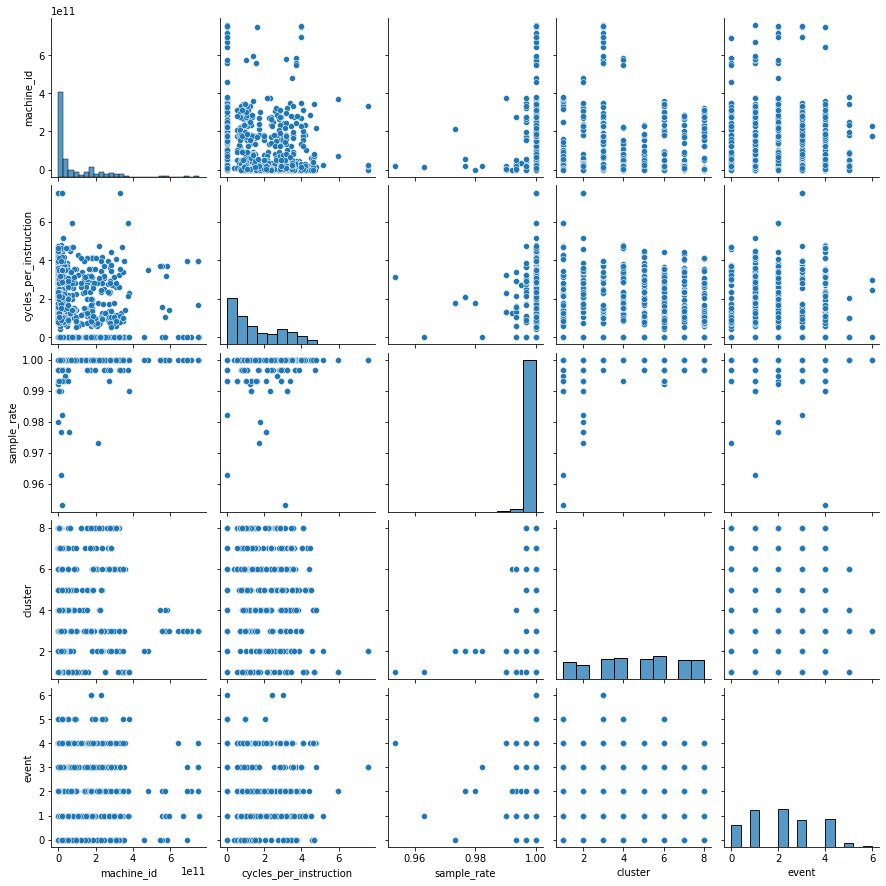

In [12]:
sns.pairplot(data)  

Gráficos Box plot


In [13]:
fig = px.box(data, x="event",y="cluster")
fig.show() 
#LOST = 0 #FAIL = 1 #FINISH = 2 #SCHEDULE = 3 #ENABLE = 4  #EVICT = 5 #KILL = 6 #UPDATE_PENDING = 7 

GRÁFICO HISTOGRAMA EMPILHADO

<Figure size 432x288 with 0 Axes>

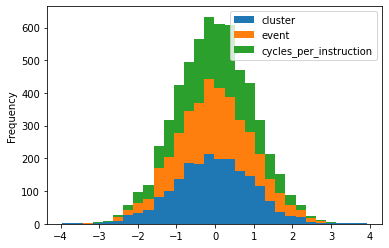

In [14]:
# HISTOGRAMA EMPILHADO
data_hist = pd.DataFrame(
      {
         "cluster": np.random.randn(2000) ,
         "event": np.random.randn(2000),
         "cycles_per_instruction": np.random.randn(2000),
       },
  columns=["cluster", "event","cycles_per_instruction"],
   ).astype(float);
plt.figure();
data_hist.plot.hist(stacked=True, bins=30);

Gráfico Boxplot

In [15]:
scatterplot1 = px.scatter(data, x="machine_id",y="cluster")
scatterplot1.show()

Matriz de Correlação


In [16]:
corr = data.iloc[:,0:].corr()
corr

,machine_id,cycles_per_instruction,sample_rate,cluster,event
machine_id,1.000000,-0.040179,0.037728,-0.039439,-0.045707
cycles_per_instruction,-0.040179,1.000000,-0.013086,0.025166,0.010548
sample_rate,0.037728,-0.013086,1.000000,0.121778,-0.001051
cluster,-0.039439,0.025166,0.121778,1.000000,0.040442
event,-0.045707,0.010548,-0.001051,0.040442,1.000000


Kmeans


In [17]:
kmeans = KMeans(n_clusters=5, random_state=1000)# random_state= semente aleatoria
clustering = kmeans.fit_predict(data) 
clustering

array([2, 2, 2, 4, 2, 4, 1, 4, 3, 2, 4, 4, 4, 4, 0, 4, 2, 4, 4, 1, 4, 4,
       4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 0, 4, 2, 0, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 0,
       4, 1, 4, 4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 0, 0, 2, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 0, 1, 3, 4, 2, 0, 4,
       2, 4, 4, 4, 0, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 0, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 1, 2, 4, 0, 4, 1, 0, 4, 4, 4, 4, 0, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 1, 4, 2, 0, 4, 4, 4, 4, 4,
       1, 4, 1, 2, 2, 4, 4, 4, 2, 1, 2, 4, 4, 4, 3, 4, 4, 4, 1, 0, 0, 4,
       4, 1, 4, 4, 3, 4, 2, 1, 4, 1, 4, 1, 4, 0, 4, 4, 2, 4, 2, 2, 4, 4,
       0, 4, 4, 2, 2, 0, 1, 0, 4, 4, 1, 4, 4, 0, 1, 4, 1, 4, 4, 4, 0, 2,
       4, 4, 1, 0, 4, 2, 4, 2, 4, 0, 4, 0, 4, 4, 2, 4, 1, 2, 0, 0, 2, 4,
       2, 2, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 2, 1, 4, 1, 4, 4, 4, 2, 4,
       4, 4, 4, 4, 4, 4, 2, 0, 4, 2, 4, 4, 4, 4, 2,

In [106]:
silhouette = silhouette_score(data, clustering)
print("Silhouette:", silhouette)

Silhouette: 0.7587858307293804


In [107]:
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage = 'average')
clustering = clustering.fit_predict(data)

In [108]:
silhouette_avg = silhouette_score(data, clustering)
print("Silhouette :", silhouette)

Silhouette : 0.7587858307293804


DBSCAN

In [32]:
X_train = data[['machine_id', 'cycles_per_instruction','cluster','event']] 
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
machine_id,1000.0,8.370389e+10,1.294059e+11,35.0,3.008420e+09,2.139281e+10,1.401458e+11,7.585650e+11
cycles_per_instruction,1000.0,1.574006e+00,1.458053e+00,0.0,0.000000e+00,1.218050e+00,2.838059e+00,7.539603e+00
cluster,1000.0,4.656000e+00,2.228594e+00,1.0,3.000000e+00,5.000000e+00,6.250000e+00,8.000000e+00
event,1000.0,2.107000e+00,1.408380e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00


In [61]:
X_train

,machine_id,cluster
257117,183278069621,6
196705,169665016234,7
176288,225381700414,4
316446,265308332,4
372612,234177386382,5
114433,4646401463,1
65051,290348050110,6
305984,10101130785,7
276559,693182446707,3
313764,159634126361,3


In [24]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_train)
DBSCAN_dataset = X_train.copy()
DBSCAN_dataset.loc[:,'cycles_per_instruction'] = db.labels_
labels = db.labels_


In [25]:
# Number of clusters in labels, ignoring noise if present.
clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise = list(labels).count(-1)

print("Estimated number of clusters: ",clusters)
print("Estimated number of noise points: ", noise)


Estimated number of clusters:  0
Estimated number of noise points:  1000


In [26]:
DBSCAN_dataset.cluster.value_counts().to_frame()



,cluster
6,152
4,135
3,131
5,128
8,127
7,123
1,114
2,90


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



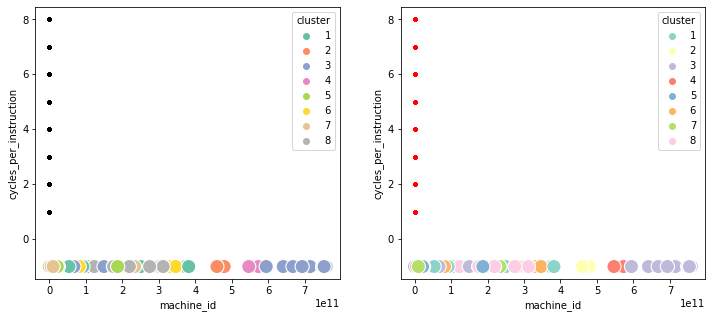

In [31]:
#'machine_id', 'cycles_per_instruction','cluster','event'

outliers = DBSCAN_dataset[DBSCAN_dataset['cycles_per_instruction']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('machine_id', 'cycles_per_instruction',

                data=DBSCAN_dataset[DBSCAN_dataset['event']!=-1],

                hue='cluster', ax=axes[0], palette='Set2', legend='full', s=200)

sns.scatterplot('machine_id', 'cycles_per_instruction',

                data=DBSCAN_dataset[DBSCAN_dataset['event']!=-1],

                hue='cluster', palette='Set3', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['event'], outliers['cluster'], s=10, label='outliers', c="k")
axes[1].scatter(outliers['event'], outliers['cluster'], s=10, label='outliers', c="r")



plt.show()



Hierarchical clustering

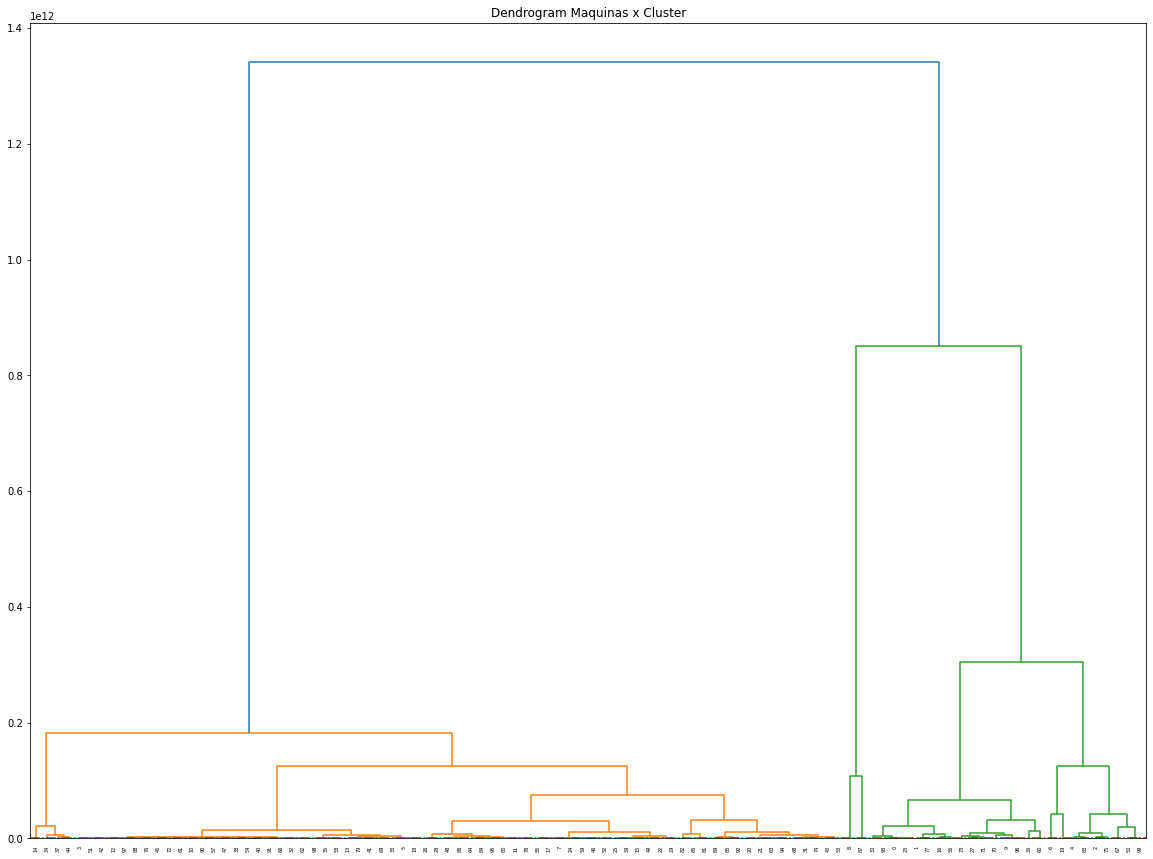

In [97]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.title("Dendrogram Maquinas x Cluster")

# Selecting Annual Income and Spending Scores by index
selected_data = X_train.iloc[0:100,0:3:2]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters) 
plt.axhline(y=1.0, color = 'r', linestyle = '-.')
plt.show()

In [98]:
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_


array([3, 3, 0, 1, 0, 1, 0, 1, 2, 3, 1, 1, 1, 1, 4, 1, 3, 1, 1, 0, 1, 1,
       1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 4, 1, 3, 4, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 3, 3, 1, 3, 1, 0, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 0])

Text(0.5, 1.0, 'Labeled Customer Data')

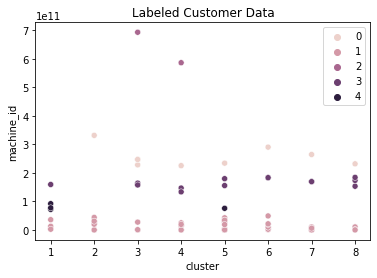

In [102]:
data_labels = clustering_model.labels_
sns.scatterplot(x='cluster', 
                y='machine_id', 
                data=selected_data, 
                hue=data_labels).set_title('Labeled Customer Data')